This workbook contains the data cleaning process and overall data exploration. 
With help of the correlation matrix and the Chi squared test of independence it is investigated if there is a correlation between variables. 

For the whole presentation of my workflow and interactive visualization of the insights, please see this Tableau story (in fullscreen: 

https://public.tableau.com/views/TravelDestinationAnalysis/Story1?:language=de-DE&publish=yes&:display_count=n&:origin=viz_share_link

Github repository with all files and short summary: 

https://github.com/JuliaIron/travel_destinations_analysis.git

#### Setting up Libraries

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [26]:
pwd

'C:\\Users\\admin\\Desktop\\travel_destinations_analysis'

#### Reading Data

In [27]:
# load original data path

path = "Interview_HW.xlsx"

In [28]:
# import function 

def load_original_data (path):
    return pd.read_excel(path)

In [29]:
df = load_original_data(path)

### Data Exploration

In [5]:
df.head()

,user_ID,user_city_source1,user_country_source1,search_ts,user_city_source2,user_country_source2,website_language,days_to_departure,trip_duration,searched_destination,distance
0,AABcC2XOsfs3qa7LEoFGYIO/iKk=,Pune,IN,2019-08-02 08:33:03 UTC,Pune,IN,en,-99,NaN,Budapest,4009.109
1,AABcC2XOsfs3qa7LEoFGYIO/iKk=,Pune,IN,2019-08-02 08:33:03 UTC,Pune,IN,en,-99,NaN,Cairo,2415.458
2,AABcC2XOsfs3qa7LEoFGYIO/iKk=,Pune,IN,2019-08-02 08:33:03 UTC,Pune,IN,en,-99,NaN,Vienna,4224.253
3,AAE/wjE8vdKAM/5wIgm+lzMggnQ=,NaN,SA,2019-08-06 00:26:59 UTC,Dammam,SA,ar,15,5.0,Sharjah,1751.397
4,AAJxNQjR5b+EpApPE9CfR0i5ew4=,Dubai,AE,2019-08-14 11:08:23 UTC,Dubai,AE,en,45,37.0,Kathmandu,2990.546


In [6]:
df.info()

# 231493 rows & 11 columns, null values, data types 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231493 entries, 0 to 231492
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   user_ID               231493 non-null  object 
 1   user_city_source1     174622 non-null  object 
 2   user_country_source1  230268 non-null  object 
 3   search_ts             231493 non-null  object 
 4   user_city_source2     175344 non-null  object 
 5   user_country_source2  230317 non-null  object 
 6   website_language      231124 non-null  object 
 7   days_to_departure     231493 non-null  int64  
 8   trip_duration         140411 non-null  float64
 9   searched_destination  231493 non-null  object 
 10  distance              231493 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 19.4+ MB


In [7]:
df.nunique()

print("There are " + str(df.user_ID.nunique()) + " unique user IDs.")
print("There are " + str(df.user_city_source1.nunique()) + " unique cities in source 1.")
print("There are " + str(df.user_country_source1.nunique()) + " unique countries in source 1.")
print("There are " + str(df.user_city_source2.nunique()) + " cities in source 2.")
print("There are " + str(df.user_country_source2.nunique()) + " countries in source 2.")
print("There are " + str(df.website_language.nunique()) + " website languages.")
print("There are " + str(df.searched_destination.nunique()) + " destinations.")

There are 61518 unique user IDs.
There are 7369 unique cities in source 1.
There are 191 unique countries in source 1.
There are 7500 cities in source 2.
There are 186 countries in source 2.
There are 45 website languages.
There are 1241 destinations.


In [8]:
df.user_ID.value_counts(dropna=False)   # dropna False also shows missing values

DZ73lmCsEADTjoHedBSOmWt8hQc=    729
PskM2SYqaXW7mMArRPqAml970iU=    587
ih7aAc5arQIvZMaZ81oLuLBFwdw=    583
GK8rhs/9pcw54t7oArwMwoms0KE=    490
ov+fYReSJLdbmBn/BCY7E7radrg=    477
                               ... 
oFzJNm4MAu9I6Pv/F4+DFmRV6bQ=      1
oFsAWTLNk0mYE39fbPLXYY1LObU=      1
oFjWQ0in+zMgzaxSV1Nfb4/85ys=      1
Q4SMOALwooVx8ZjDKom1fJ4jnNk=      1
f3oXlXlzr3ml/ccmA9y3uFGkWyI=      1
Name: user_ID, Length: 61518, dtype: int64

There is a user_id that conducted 729 searches.

In [9]:
df.user_city_source1.value_counts(dropna=False)

NaN             56871
Dubai           17548
Riyadh          14091
Jeddah          13292
Abu Dhabi        6101
                ...  
Ogy                 1
Bariadi             1
Melzo               1
Baarlo              1
Bommanahalli        1
Name: user_city_source1, Length: 7370, dtype: int64

The most searches come from the user city Dubai with 17.548 counts/searches (for source 1)

There are 56.871 null values for the user city 

In [10]:
df.user_city_source2.value_counts(dropna=False)

NaN                   56149
Dubai                 21919
Jeddah                14727
Riyadh                14711
Abu Dhabi              6341
                      ...  
Pechbonnieu               1
Villiers-sur-Marne        1
Sarria de Ter             1
Riesi                     1
Oisterwijk                1
Name: user_city_source2, Length: 7501, dtype: int64

The most searches come from the user city Dubai with 21.919 counts/searches (for source 2)

There are 56.149 null values for the user city. 723 less that in the other source.

In [11]:
df.user_country_source2.value_counts(dropna=False)

SA    56336
AE    42194
GB    15800
DE    14194
FR    12971
      ...  
BQ        1
TL        1
GY        1
IR        1
MW        1
Name: user_country_source2, Length: 187, dtype: int64

The most searches come from Saudi Arabia

##### Decision: 
#### There are more unique user cities and less null values in source 2. 
#### I decide to continue my analysis with only one user city as origin of the searches. Thus I choose source 2 to continue with.

#### For another approach one could compare both sources. But as the values are pretty similar, I think there will not be groundbreaking insights.

In [12]:
df.trip_duration.value_counts(dropna=False)

NaN      91082
7.0      19185
4.0      11144
3.0      10340
5.0       9517
         ...  
211.0        1
291.0        1
341.0        1
249.0        1
376.0        1
Name: trip_duration, Length: 303, dtype: int64

Most of the searched trips had a duration of 7 days

In [13]:
df.searched_destination.value_counts(dropna=False)

Cairo             13829
Istanbul          11586
Abu Dhabi         10024
Sharjah            8371
Riyadh             6472
                  ...  
Rochester             1
Huatulco              1
Nuuk (Godthab)        1
Kairouan              1
Zweibrücken           1
Name: searched_destination, Length: 1241, dtype: int64

Cairo is the most searched destination followed by Istanbul. 

In [14]:
df.days_to_departure.value_counts(dropna=False)

1      13545
2      12654
3      11568
4       9454
5       8888
       ...  
489        1
376        1
366        1
412        1
416        1
Name: days_to_departure, Length: 407, dtype: int64

Most searches are 1 to 3 days before the departure. 

In [15]:
df.describe()

# Statistical summary of numerical

,days_to_departure,trip_duration,distance
count,231493.000000,140411.000000,231493.000000
mean,34.648564,13.918090,3681.236986
std,66.938996,22.786018,2032.839966
min,-99.000000,0.000000,1006.909000
25%,4.000000,5.000000,2025.488000
50%,13.000000,8.000000,2987.934000
75%,41.000000,14.000000,5248.752000
max,649.000000,569.000000,9759.721000


The data set contains 3 numerical variables.

There are negative values for days_to_departure, this has to be removed/replaced as well as trip durations of 0 days. 

### Data Cleaning 

#### Changing Data Types

In [43]:
df.dtypes

user_ID                  object
user_city_source1        object
user_country_source1     object
search_ts                object
user_city_source2        object
user_country_source2     object
website_language         object
days_to_departure         int64
trip_duration           float64
searched_destination     object
distance                float64
dtype: object

In [44]:
df['user_ID'] = df['user_ID'].astype('str')
df['user_city_source2'] = df['user_city_source2'].astype('str')
df['user_country_source2'] = df['user_country_source2'].astype('str')
df['searched_destination'] = df['searched_destination'].astype('str')
df['website_language'] = df['website_language'].astype('str')

# df['trip_duration'] = df['trip_duration'].astype('int')

In [45]:
df = df.convert_dtypes() # conversion into strings

In [46]:
df.dtypes

user_ID                  string
user_city_source1        string
user_country_source1     string
search_ts                string
user_city_source2        string
user_country_source2     string
website_language         string
days_to_departure         Int64
trip_duration             Int64
searched_destination     string
distance                Float64
dtype: object

In [47]:
df["search_ts"]= pd.to_datetime(df["search_ts"])

# Change the search date to a datetime data format 

In [48]:
df["search_ts"] = df["search_ts"].dt.tz_localize(None)    # to remove UTC info

# Or df["search_ts"].dt.tz_convert(None)

##### Drop columns

I decided to continue with one column of user_city_source2

In [49]:
def drop_columns(df):
    df.drop(columns=["user_city_source1","user_country_source1"], inplace=True)
    return df

In [50]:
drop_columns(df)

,user_ID,search_ts,user_city_source2,user_country_source2,website_language,days_to_departure,trip_duration,searched_destination,distance
0,AABcC2XOsfs3qa7LEoFGYIO/iKk=,2019-08-02 08:33:03,Pune,IN,en,-99,<NA>,Budapest,4009.109
1,AABcC2XOsfs3qa7LEoFGYIO/iKk=,2019-08-02 08:33:03,Pune,IN,en,-99,<NA>,Cairo,2415.458
2,AABcC2XOsfs3qa7LEoFGYIO/iKk=,2019-08-02 08:33:03,Pune,IN,en,-99,<NA>,Vienna,4224.253
3,AAE/wjE8vdKAM/5wIgm+lzMggnQ=,2019-08-06 00:26:59,Dammam,SA,ar,15,5,Sharjah,1751.397
4,AAJxNQjR5b+EpApPE9CfR0i5ew4=,2019-08-14 11:08:23,Dubai,AE,en,45,37,Kathmandu,2990.546
...,...,...,...,...,...,...,...,...,...
231488,//9kCAtnkvUOed+wIftudFgSCJs=,2019-08-19 16:15:48,nan,AE,en,145,<NA>,Sharjah,1751.397
231489,//9kCAtnkvUOed+wIftudFgSCJs=,2019-08-19 16:15:48,nan,AE,en,4,<NA>,Calicut,2675.449
231490,//9kCAtnkvUOed+wIftudFgSCJs=,2019-08-19 16:15:48,nan,AE,en,13,<NA>,Calicut,2675.449
231491,///1uR4moCTPK0arzF9BBOY/qfk=,2019-08-29 07:44:28,nan,GB,en,24,9,PÃ¡fos,2434.064


#### Duplicates Removing 

In [51]:
df.shape

(231493, 9)

In [52]:
def drop_duplicates(df):
    df.drop_duplicates()
    return df

In [53]:
drop_duplicates(df)

,user_ID,search_ts,user_city_source2,user_country_source2,website_language,days_to_departure,trip_duration,searched_destination,distance
0,AABcC2XOsfs3qa7LEoFGYIO/iKk=,2019-08-02 08:33:03,Pune,IN,en,-99,<NA>,Budapest,4009.109
1,AABcC2XOsfs3qa7LEoFGYIO/iKk=,2019-08-02 08:33:03,Pune,IN,en,-99,<NA>,Cairo,2415.458
2,AABcC2XOsfs3qa7LEoFGYIO/iKk=,2019-08-02 08:33:03,Pune,IN,en,-99,<NA>,Vienna,4224.253
3,AAE/wjE8vdKAM/5wIgm+lzMggnQ=,2019-08-06 00:26:59,Dammam,SA,ar,15,5,Sharjah,1751.397
4,AAJxNQjR5b+EpApPE9CfR0i5ew4=,2019-08-14 11:08:23,Dubai,AE,en,45,37,Kathmandu,2990.546
...,...,...,...,...,...,...,...,...,...
231488,//9kCAtnkvUOed+wIftudFgSCJs=,2019-08-19 16:15:48,nan,AE,en,145,<NA>,Sharjah,1751.397
231489,//9kCAtnkvUOed+wIftudFgSCJs=,2019-08-19 16:15:48,nan,AE,en,4,<NA>,Calicut,2675.449
231490,//9kCAtnkvUOed+wIftudFgSCJs=,2019-08-19 16:15:48,nan,AE,en,13,<NA>,Calicut,2675.449
231491,///1uR4moCTPK0arzF9BBOY/qfk=,2019-08-29 07:44:28,nan,GB,en,24,9,PÃ¡fos,2434.064


In [54]:
df.duplicated().sum()

0

There were no rows that are absolute duplicates 

#### Null values

In [55]:
df.isnull().sum().sort_values(ascending=False)  # isna()

trip_duration           91082
user_ID                     0
search_ts                   0
user_city_source2           0
user_country_source2        0
website_language            0
days_to_departure           0
searched_destination        0
distance                    0
dtype: int64

In [56]:
round(df.isnull().sum()/len(df),4)*100  # shows the percentage of null values in a column

user_ID                  0.00
search_ts                0.00
user_city_source2        0.00
user_country_source2     0.00
website_language         0.00
days_to_departure        0.00
trip_duration           39.35
searched_destination     0.00
distance                 0.00
dtype: float64

In [57]:
#df.isna().head(10)   #.tail(20)

In [58]:
df[df['user_city_source2'].isnull()==True]

# It shows there are no missing values in user city. But from examining the dataset there are missing cities. To be inspected.

,user_ID,search_ts,user_city_source2,user_country_source2,website_language,days_to_departure,trip_duration,searched_destination,distance


In [59]:
print("The percentage of user cities with missing values is " + str(round((df['user_city_source2'] == 'nan').sum()/len(df),4)*100) + " % of the whole dataset.")

#round((df['user_city_source2'] == 'nan').sum()/len(df),4)*100
# filtering for 'nan' as string. This can happen when dataset is uploaded as load_excel 

The percentage of user cities with missing values is 24.26 % of the whole dataset.


In [60]:
print("The percentage of user country with missing values is " + str(round((df['user_country_source2'] == 'nan').sum()/len(df),4)*100) + " % of the whole dataset.")

#round((df['user_country_source2'] == 'nan').sum()/len(df),4)*100

The percentage of user country with missing values is 0.51 % of the whole dataset.


##### The quality of the dataset is medium. In order to thouroughly analyse the origin and destination cities, we need the user_cities for every search and thus would drop 24% of the rows. Here I drop all missing user cities in order to work with complete data. 

In [61]:
df_clean_cities = df[df['user_city_source2'] != 'nan']  

# df.dropna(subset=['user_city_source2']) doesn´t work because it´s not NaN values but 'nan' strings

In [62]:
df_clean_cities.shape

(175344, 9)

#### Negative value handling 

##### Days to departure

In [63]:
df_clean_cities[df_clean_cities['days_to_departure'] <= 0].head(20)

,user_ID,search_ts,user_city_source2,user_country_source2,website_language,days_to_departure,trip_duration,searched_destination,distance
0,AABcC2XOsfs3qa7LEoFGYIO/iKk=,2019-08-02 08:33:03,Pune,IN,en,-99,<NA>,Budapest,4009.109
1,AABcC2XOsfs3qa7LEoFGYIO/iKk=,2019-08-02 08:33:03,Pune,IN,en,-99,<NA>,Cairo,2415.458
2,AABcC2XOsfs3qa7LEoFGYIO/iKk=,2019-08-02 08:33:03,Pune,IN,en,-99,<NA>,Vienna,4224.253
69,AAj96fhkuM6Vn3mPfd938XSoUMg=,2019-08-30 09:03:53,London,GB,en,-99,<NA>,Manchester,5655.281
100,ABUYL9zjJkMAJqxkWIEKEbTVGNg=,2019-08-29 14:01:19,Nanterre,FR,fr,-99,<NA>,Sevilla,5870.749
191,AB2RMOBNuRYf3XMaefozb018ur8=,2019-08-20 04:51:37,Yerevan,AM,en,0,7,Sharjah,1751.397
197,AB6XY7AeKXTR/HW5z3JOeWHNPyg=,2019-08-26 17:02:21,Bristol,GB,en,-99,<NA>,"Washington, DC",1133.123
199,AB6XY7AeKXTR/HW5z3JOeWHNPyg=,2019-08-26 17:02:21,Bristol,GB,en,-99,<NA>,Orlando,1245.711
217,ACKqcWR3edQE9yuLvu725aTFa3M=,2019-08-27 17:43:02,Charleroi,BE,fr,-99,<NA>,Lisbon,6137.809
223,ZJ4oBL+uXKEkDZt4ZLMu8w5picw=,2019-09-11 14:40:15,AlcalÃƒÂ¡ de Henares,ES,es,-99,<NA>,Albacete,5508.573


Analyzing rows with -99, one can see that a user_id conducted several searches to different destinations in the same second. As I assume that this coulnd´t be conducted by a human, I remove these rows.

In [64]:
print(str(round((df_clean_cities['days_to_departure'] <= 0).sum()/len(df_clean_cities),4)*100) + " % of the days to departure column contain negative or zero values.")

# round((df_clean_cities['days_to_departure'] <= 0).sum()/len(df_clean_cities),4)*100

6.22 % of the days to departure column contain negative or zero values.


In [65]:
(df_clean_cities['days_to_departure'] <= 0).sum()

10904

10904 rows/searches have a negative or zero value for days_to_departure. Negatives could be set to 0, but this is not realistic for searching for flights. 

I create a new dataframe where I save these rows, they might be useful. 

In [66]:
df_dropped_days_to_departure = df_clean_cities[df_clean_cities['days_to_departure'] <= 0]
# save the dropped in another df

In [67]:
df_clean_cities = df_clean_cities[df_clean_cities['days_to_departure'] > 0]

##### Trip duration

In [68]:
round(df_clean_cities.isnull().sum()/len(df_clean_cities),4)*100 

#df_clean_cities.isnull().sum().sort_values(ascending=False)

user_ID                  0.00
search_ts                0.00
user_city_source2        0.00
user_country_source2     0.00
website_language         0.00
days_to_departure        0.00
trip_duration           35.79
searched_destination     0.00
distance                 0.00
dtype: float64

In [69]:
(df_clean_cities['trip_duration'] <=0).sum()

744

In [70]:
df_clean_cities['trip_duration'] = df_clean_cities['trip_duration'].astype('float')

In order to not loose 35% of the rows, The NaN will be replaced by the mean of the trip duration 

In [71]:
df_clean_cities.trip_duration.mean()

14.042719825749325

In [72]:
mean_trip_duration = np.mean(df_clean_cities['trip_duration'])  # mean=14days
df_clean_cities['trip_duration'] = df_clean_cities['trip_duration'].fillna(mean_trip_duration)

In [73]:
df_clean_cities = df_clean_cities[df_clean_cities['trip_duration'] > 0]

In [74]:
df_clean_cities.shape

(163696, 9)

Trip durations of 0 have been removed and missing values replaced by the mean.

#### Save cleaned data set 

In [75]:
df_clean_cities.to_csv('df_clean_cities.csv', index=False)

In [76]:
df_clean_cities.to_excel('df_clean_cities.xlsx', index=False)

## Is there a correlation between user city and destination or any other variable? 

Pair plotting the numerical variables of the data set to see if there might be a correlation. 

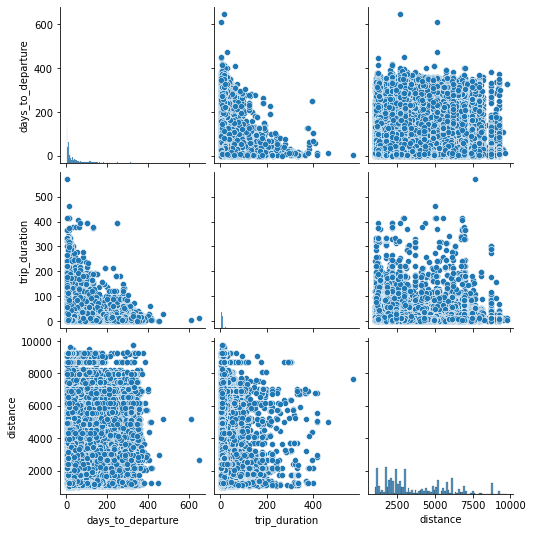

In [53]:
sns.pairplot(df_clean_cities)

There is no positive or negative correlation visible in the plotting. 

Checking the distribution:

findfont: Font family ['bold'] not found. Falling back to DejaVu Sans.


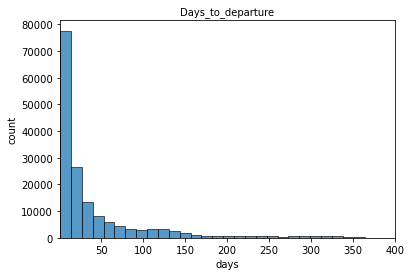

In [54]:
#plt.figure(figsize=(10,3))
fig, ax = plt.subplots()
sns.histplot(df_clean_cities['days_to_departure'], ax=ax,bins=50 )  
ax.set_xlim(1,400)
plt.xlabel("days", fontsize=10)
plt.ylabel("count", fontsize=10)
plt.title("Days_to_departure", fontsize=10, font="bold");
#ax.set_xticks(range(1,200))
plt.show()

C:\Users\admin\anaconda3\envs\DA_env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='days_to_departure', ylabel='Density'>

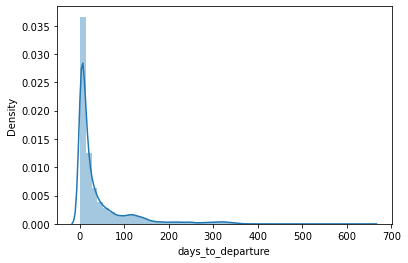

In [56]:
sns.distplot((df_clean_cities['days_to_departure']), bins=50)

The distributions are right-skewed and not normally distributed.
Outliers can skew data and should be handled. 


### Pearson correlation coefficient

It is a number that shows the strength of the relationship between two numerical variables.

It assumes a linear relationship, normal distribution  & data must be homoscedastic. Homoscedasticity assumes that data is equally distributed about the regression line

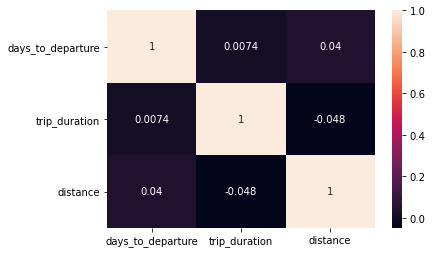

In [77]:
sns.heatmap(df_clean_cities.corr(), annot=True);

In [78]:
df_clean_cities.corr()

,days_to_departure,trip_duration,distance
days_to_departure,1.000000,0.007381,0.039702
trip_duration,0.007381,1.000000,-0.048336
distance,0.039702,-0.048336,1.000000


A Correlation Coefficient near to 0 (both positive or negative) indicates the absence of any correlation between the two variables, and hence those variables are independent of each other.

As a next step I would create a linear regression model, but requierement for this is that there is a correlation. 

#### Conclusion: There is no correlation between days to departure, trip duration or distance. 

### Spearman correlation coefficient

Spearman correlation does not assume that both datasets are normally distributed.
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html

In [138]:
from scipy.stats import spearmanr

spearmanr(df_clean_cities['days_to_departure'], df_clean_cities['trip_duration'])


SpearmanrResult(correlation=-0.06034746617232334, pvalue=6.703851810518585e-132)

In [137]:
spearmanr(df_clean_cities['days_to_departure'], df_clean_cities['distance'])

SpearmanrResult(correlation=0.06876168633240126, pvalue=9.825245860932214e-171)

In [139]:
df_clean_cities.corr(method='spearman')

,days_to_departure,trip_duration,distance
days_to_departure,1.000000,-0.060347,0.068762
trip_duration,-0.060347,1.000000,-0.107852
distance,0.068762,-0.107852,1.000000


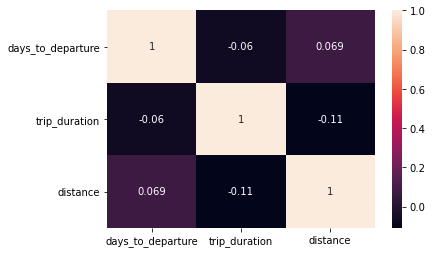

In [140]:
sns.heatmap(df_clean_cities.corr(method='spearman'), annot=True);

## Checking correlation between nominal/categorical variables

Most of the variables in the dataset are non numerical but nominal/categorical.

First idea:

In order to calculate a correlation coefficient, we need to transform the values of each column/variable to a numerical. 

I thought of encoding the user cities and destionation cities with One Hot Encoding. 
One-Hot-Encoding takes categorical features and replaces them by making a binary column out of each unique value of the categorical feature. 
But as we have more than 1000 categories, it would get messy.


#### Measures of Association for Nominal Variables

Nominal variable association refers to the statistical relationship on nominal variables. Measures strength of the association between two nominal variables.

#### Hypothesis Testing

First we need to set a hypothesis for the test: 
    
H₀ (Null Hypothesis) — the 2 categorical variables being compared are independent of each other (no relationship).

H₁ (Alternate Hypothesis) — the 2 categorical variables being compared are dependent on each other (a relationship).

In hypothesis testing the p-value is the probability of getting test results at least as extreme as the results actually observed (as larger or larger), under the assumption that the null hypothesis is correct.

P-value of 0.05 (level of significance) or greater is considered critical, anything less means the deviations are significant and the hypothesis being tested must be rejected.

p < 0.05 — the two categorical variables are correlated.

p > 0.05 — the two categorical variables are not correlated.

### Chi Square test of Independence

The Chi-square test of independence is a statistical hypothesis test used to determine whether two categorical/nominal variables are likely to be related or not. 

It assess the relationship between nominal variables.

##### p-value
the probability of getting a chi-square as large or larger than that in the observed 

###### Contingency table:

crosstabulation shows whether being in one category of the independent variable (columns) makes a case more likely to be in a particular category of the dependent variable (rows). 
The frequency of each category for one variable is compared across the categories of the second variable.

###### Degree of freedom
d.f. = (number of rows -1) *(number of columns-1)

##### Expected values
These are the counts to be expected if the two variables had no influence on each other.

Using a function to conduct the steps of the test: 
source: https://towardsdatascience.com/statistics-in-python-using-chi-square-for-feature-selection-d44f467ca745 

In [87]:
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.contingency_tables as ct

In [71]:
def chi2(df, col1, col2):    
    
    # create the contingency table
    
    df_cont = pd.crosstab(index = df[col1], columns = df[col2])
    #display(df_cont)    
    
    
    # calculate degree of freedom
    
    degree_f = (df_cont.shape[0]-1) * (df_cont.shape[1]-1)    
    
    
    # sum up the totals for row and columns
    
    df_cont.loc[:,'Total']= df_cont.sum(axis=1)
    df_cont.loc['Total']= df_cont.sum()
    print('---Observed (O)---')
    display(df_cont)    
    
    
    # create the expected value dataframe
    
    df_exp = df_cont.copy()    
    df_exp.iloc[:,:] = np.multiply.outer(
        df_cont.sum(1).values,df_cont.sum().values) / df_cont.sum().sum()            
    print('---Expected (E)---')
    display(df_exp)
    
        
    # calculate chi-square values
    # (observed-expected)2-squared/ expected
    
    df_chi2 = ((df_cont - df_exp)**2) / df_exp    
    df_chi2.loc[:,'Total']= df_chi2.sum(axis=1)
    df_chi2.loc['Total']= df_chi2.sum()
    
    print('---Chi-Square---')
    display(df_chi2)    
    
    
    # get chi-square score
    chi_square_score = df_chi2.iloc[:-1,:-1].sum().sum()
    
    
    # calculate the p-value
    p = stats.distributions.chi2.sf(chi_square_score, degree_f)    
    
    return chi_square_score, degree_f, p


Apply function for user city and searched destination: 

In [99]:
chi_score, degree_f, p = chi2(df_clean_cities,'user_city_source2','searched_destination')
print(f'Chi2_score: {chi_score}, Degrees of freedom: {degree_f}, p-value: {p}')

NameError: name 'chi2' is not defined

#### Result: With a p-value of 0.0 (p < 0.05) we reject the null hypothesis. 
#### There is a relationship between the variables user city and searched destination.

Apply function for website language and searched destination: 

In [63]:
chi_score, degree_f, p = chi2_by_hand(df_clean_cities,'website_language','searched_destination')
print(f'Chi2_score: {chi_score}, Degrees of freedom: {degree_f}, p-value: {p}')

searched_destination,A CoruÃ±a,Aberdeen,Abha,Abidjan,Abu Dhabi,Abuja,Acapulco,Accra,Adana,Addis Ababa,...,Ziguinchor,Zihuatanejo,Zonguldak,Zurich,ZÃ¡kinthos,ÃœrÃ¼mqi,Ã„ngelholm,Ã…lesund,Ã…rhus,Ä°zmir
website_language,,,,,,,,,,,,,,,,,,,,,
[%.,0,0,0,0,953,0,2,0,0,0,...,0,0,0,0,39,0,0,0,0,0
ar,0,0,705,3,2376,12,0,18,33,307,...,0,0,2,48,0,0,0,10,0,33
be,0,0,0,0,6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
bg-,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
da,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
de,0,2,0,0,206,0,0,1,11,3,...,0,0,0,16,7,0,1,0,0,22
de-,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
el,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
en,1,6,498,22,3519,41,0,65,18,97,...,0,1,0,92,12,13,0,0,1,48


---Observed (O)---


searched_destination,A CoruÃ±a,Aberdeen,Abha,Abidjan,Abu Dhabi,Abuja,Acapulco,Accra,Adana,Addis Ababa,...,Zihuatanejo,Zonguldak,Zurich,ZÃ¡kinthos,ÃœrÃ¼mqi,Ã„ngelholm,Ã…lesund,Ã…rhus,Ä°zmir,Total
website_language,,,,,,,,,,,,,,,,,,,,,
[%.,0,0,0,0,953,0,2,0,0,0,...,0,0,0,39,0,0,0,0,0,9402
ar,0,0,705,3,2376,12,0,18,33,307,...,0,2,48,0,0,0,10,0,33,56015
be,0,0,0,0,6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,285
bg-,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
da,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,30
de,0,2,0,0,206,0,0,1,11,3,...,0,0,16,7,0,1,0,0,22,4474
de-,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,22
el,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
en,1,6,498,22,3519,41,0,65,18,97,...,1,0,92,12,13,0,0,1,48,66392


---Expected (E)---


searched_destination,A CoruÃ±a,Aberdeen,Abha,Abidjan,Abu Dhabi,Abuja,Acapulco,Accra,Adana,Addis Ababa,...,Zihuatanejo,Zonguldak,Zurich,ZÃ¡kinthos,ÃœrÃ¼mqi,Ã„ngelholm,Ã…lesund,Ã…rhus,Ä°zmir,Total
website_language,,,,,,,,,,,,,,,,,,,,,
[%.,0.402033,0.689199,69.149667,3.675730,430.634723,3.273697,0.229733,6.375094,3.733163,24.524010,...,0.057433,0.114867,11.658956,4.479796,0.804066,0.057433,0.574333,0.114867,8.385259,9402.0
ar,2.395222,4.106095,411.978156,21.899171,2565.624759,19.503949,1.368698,37.981375,22.241346,146.108532,...,0.342175,0.684349,69.461433,26.689615,4.790444,0.342175,3.421745,0.684349,49.957484,56015.0
be,0.012187,0.020891,2.096113,0.111421,13.053701,0.099235,0.006964,0.193246,0.113162,0.743389,...,0.001741,0.003482,0.353414,0.135795,0.024373,0.001741,0.017410,0.003482,0.254180,285.0
bg-,0.000086,0.000147,0.014710,0.000782,0.091605,0.000696,0.000049,0.001356,0.000794,0.005217,...,0.000012,0.000024,0.002480,0.000953,0.000171,0.000012,0.000122,0.000024,0.001784,2.0
da,0.001283,0.002199,0.220643,0.011729,1.374074,0.010446,0.000733,0.020342,0.011912,0.078251,...,0.000183,0.000367,0.037202,0.014294,0.002566,0.000183,0.001833,0.000367,0.026756,30.0
de,0.191310,0.327960,32.905298,1.749119,204.920203,1.557809,0.109320,3.033628,1.776449,11.669902,...,0.027330,0.054660,5.547986,2.131739,0.382620,0.027330,0.273300,0.054660,3.990177,4474.0
de-,0.000941,0.001613,0.161805,0.008601,1.007654,0.007660,0.000538,0.014917,0.008735,0.057384,...,0.000134,0.000269,0.027281,0.010482,0.001881,0.000134,0.001344,0.000269,0.019621,22.0
el,0.000128,0.000220,0.022064,0.001173,0.137407,0.001045,0.000073,0.002034,0.001191,0.007825,...,0.000018,0.000037,0.003720,0.001429,0.000257,0.000018,0.000183,0.000037,0.002676,3.0
en,2.838946,4.866765,488.298736,25.956079,3040.916880,23.117133,1.622255,45.017575,26.361643,173.175715,...,0.405564,0.811127,82.329438,31.633971,5.677892,0.405564,4.055637,0.811127,59.212305,66392.0


---Chi-Square---


searched_destination,A CoruÃ±a,Aberdeen,Abha,Abidjan,Abu Dhabi,Abuja,Acapulco,Accra,Adana,Addis Ababa,...,Zihuatanejo,Zonguldak,Zurich,ZÃ¡kinthos,ÃœrÃ¼mqi,Ã„ngelholm,Ã…lesund,Ã…rhus,Ä°zmir,Total
website_language,,,,,,,,,,,,,,,,,,,,,
[%.,0.402033,0.689199,69.149667,3.675730,633.635582,3.273697,13.641241,6.375094,3.733163,24.524010,...,0.057433,0.114867,11.658956,266.004205,0.804066,0.057433,0.574333,0.114867,8.385259,60327.865073
ar,2.395222,4.106095,208.413481,16.310146,14.015124,2.887069,1.368698,10.511872,5.204210,177.170109,...,0.342175,2.529319,6.630919,26.689615,4.790444,0.342175,12.646596,0.684349,5.756020,34867.300511
be,0.012187,0.020891,2.096113,0.111421,3.811539,0.099235,0.006964,0.193246,0.113162,0.743389,...,0.001741,0.003482,0.353414,0.135795,0.024373,0.001741,0.017410,0.003482,29.662183,3950.827339
bg-,0.000086,0.000147,0.014710,0.000782,0.091605,0.000696,0.000049,0.001356,0.000794,0.005217,...,0.000012,0.000024,0.002480,0.000953,0.000171,0.000012,0.000122,0.000024,0.001784,149.922907
da,0.001283,0.002199,0.220643,0.011729,1.374074,0.010446,0.000733,0.020342,0.011912,0.078251,...,0.000183,0.000367,0.037202,0.014294,0.002566,0.000183,0.001833,0.000367,0.026756,8690.260832
de,0.191310,8.524577,32.905298,1.749119,0.005690,1.557809,0.109320,1.363266,47.889867,6.441117,...,0.027330,0.054660,19.690854,11.117672,0.382620,34.617182,0.273300,0.054660,81.288044,15589.299257
de-,0.000941,0.001613,0.161805,0.008601,0.000058,0.007660,0.000538,0.014917,0.008735,0.057384,...,0.000134,0.000269,0.027281,0.010482,0.001881,0.000134,0.001344,0.000269,0.019621,16053.565221
el,0.000128,0.000220,0.022064,0.001173,0.137407,0.001045,0.000073,0.002034,0.001191,0.007825,...,0.000018,0.000037,0.003720,0.001429,0.000257,0.000018,0.000183,0.000037,0.002676,675.576943
en,1.191190,0.263876,0.192740,0.602963,75.162682,13.833763,1.622255,8.869810,2.652227,33.507813,...,0.871267,0.811127,1.135921,12.186040,9.442458,0.405564,4.055637,0.043979,2.123136,25867.049438


Chi2_score: 517517.63943535276, Degrees of freedom: 41369, p-value: 0.0


#### Result: With a p-value of 0.0 (p < 0.05)  — the variables website language and searched destination are correlated.

##### Another approach to calculate Chi, generates same values: 

In [2]:
myCrosstable = pd.crosstab(df_clean_cities['user_city_source2'],
                            df_clean_cities['searched_destination'],
                           margins=True, margins_name="Total")

from scipy.stats import chi2_contingency

chiVal, pVal, df, exp  = chi2_contingency(myCrosstable)
chiVal, pVal, df

NameError: name 'pd' is not defined

#### Problem with the test and dataset: 

##### The chi square test could only be used if no more than 20% of the cells have an expected count, of less than 5. And the minimum expected count is at least 1. 

##### This condition is unfortunately not meet with this dataset.

The Chi-square test is sensitive to sample size.
In large sample sizes, statistical significance may surface while the association is not substantial (i.e. very weak)
https://towardsdatascience.com/levels-of-measurement-statistics-and-python-implementations-8ff8e7867d0b 

#### Second Approach: 

I filtered only these rows, where the combination website_language and searched_destination is > 5:
For example: Cairo was searched with ar website_language 7856 times. 


In [92]:
path = "website_language_destination.xlsx"

def load_original_data (path):
    return pd.read_excel(path)

df = load_original_data(path)

In [93]:
df.head()

,user_city_source2,user_country_source2,website_language,searched_destination,counts (language vs. Destination)
0,Dammam,SA,ar,Sharjah,3081
1,Dammam,SA,ar,Cairo,7856
2,Dammam,SA,ar,Cairo,7856
3,Cairo,EG,ar,Abu Dhabi,2376
4,Riyadh,SA,ar,Taif,293


In [98]:
chi_score, degree_f, p = chi2(df,'website_language','searched_destination')
print(f'Chi2_score: {chi_score}, Degrees of freedom: {degree_f}, p-value: {p}')

searched_destination,Aberdeen,Abha,Abidjan,Abu Dhabi,Abuja,Accra,Adana,Addis Ababa,Agadir,Agartala,...,Yekaterinburg,Yerevan,Zadar,Zagreb,Zanzibar,Zurich,ZÃ¡kinthos,ÃœrÃ¼mqi,Ã…lesund,Ä°zmir
website_language,,,,,,,,,,,,,,,,,,,,,
ar,0,705,0,2376,12,18,33,307,75,0,...,0,33,0,14,35,48,0,0,10,33
be,0,0,0,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
de,0,0,0,206,0,0,11,0,6,0,...,0,6,6,0,35,16,7,0,0,22
en,6,498,22,3519,41,65,18,97,134,14,...,13,175,0,27,106,92,12,13,0,48
en-,0,0,0,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
es,0,0,0,27,0,0,0,0,0,0,...,0,0,0,0,0,18,0,0,0,0
fa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
fr,0,0,35,179,0,13,0,0,185,0,...,0,0,10,0,59,8,0,0,0,28
id,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


---Observed (O)---


searched_destination,Aberdeen,Abha,Abidjan,Abu Dhabi,Abuja,Accra,Adana,Addis Ababa,Agadir,Agartala,...,Yerevan,Zadar,Zagreb,Zanzibar,Zurich,ZÃ¡kinthos,ÃœrÃ¼mqi,Ã…lesund,Ä°zmir,Total
website_language,,,,,,,,,,,,,,,,,,,,,
ar,0,705,0,2376,12,18,33,307,75,0,...,33,0,14,35,48,0,0,10,33,55593
be,0,0,0,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,101
de,0,0,0,206,0,0,11,0,6,0,...,6,6,0,35,16,7,0,0,22,4015
en,6,498,22,3519,41,65,18,97,134,14,...,175,0,27,106,92,12,13,0,48,65679
en-,0,0,0,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,82
es,0,0,0,27,0,0,0,0,0,0,...,0,0,0,0,18,0,0,0,0,2259
fa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,24
fr,0,0,35,179,0,13,0,0,185,0,...,0,10,0,59,8,0,0,0,28,10224
id,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,105


---Expected (E)---


searched_destination,Aberdeen,Abha,Abidjan,Abu Dhabi,Abuja,Accra,Adana,Addis Ababa,Agadir,Agartala,...,Yerevan,Zadar,Zagreb,Zanzibar,Zurich,ZÃ¡kinthos,ÃœrÃ¼mqi,Ã…lesund,Ä°zmir,Total
website_language,,,,,,,,,,,,,,,,,,,,,
ar,2.237743,448.667510,21.258560,2432.799805,19.766732,38.041634,23.123346,153.285409,154.031323,5.221401,...,79.812840,8.578016,15.291245,126.059533,72.726654,13.053502,4.848444,3.729572,52.586965,55593.0
be,0.004065,0.815128,0.038622,4.419851,0.035912,0.069113,0.042010,0.278485,0.279840,0.009486,...,0.145002,0.015584,0.027781,0.229022,0.132128,0.023715,0.008809,0.006776,0.095539,101.0
de,0.161613,32.403361,1.535321,175.700020,1.427579,2.747417,1.669999,11.070475,11.124346,0.377096,...,5.764189,0.619516,1.104354,9.104186,5.252415,0.942741,0.350161,0.269355,3.797900,4015.0
en,2.643727,530.067335,25.115410,2874.172259,23.352925,44.943365,27.318516,181.095324,181.976566,6.168697,...,94.292942,10.134288,18.065470,148.929975,85.921139,15.421743,5.728076,4.406212,62.127593,65679.0
en-,0.003301,0.661787,0.031357,3.588394,0.029156,0.056112,0.034107,0.226097,0.227197,0.007702,...,0.117724,0.012653,0.022555,0.185939,0.107272,0.019254,0.007151,0.005501,0.077566,82.0
es,0.090930,18.231430,0.863833,98.855877,0.803213,1.545807,0.939608,6.228693,6.259003,0.212170,...,3.243164,0.348564,0.621354,5.122380,2.955219,0.530424,0.197015,0.151550,2.136851,2259.0
fa,0.000966,0.193694,0.009178,1.050262,0.008533,0.016423,0.009983,0.066175,0.066497,0.002254,...,0.034456,0.003703,0.006601,0.054421,0.031397,0.005635,0.002093,0.001610,0.022702,24.0
fr,0.411539,82.513565,3.909620,447.411458,3.635261,6.996163,4.252569,28.190420,28.327600,0.960258,...,14.678224,1.577566,2.812183,23.183362,13.375017,2.400644,0.891668,0.685898,9.671166,10224.0
id,0.004226,0.847410,0.040152,4.594895,0.037334,0.071850,0.043674,0.289514,0.290923,0.009862,...,0.150745,0.016202,0.028881,0.238092,0.137361,0.024655,0.009157,0.007044,0.099322,105.0


---Chi-Square---


searched_destination,Aberdeen,Abha,Abidjan,Abu Dhabi,Abuja,Accra,Adana,Addis Ababa,Agadir,Agartala,...,Yerevan,Zadar,Zagreb,Zanzibar,Zurich,ZÃ¡kinthos,ÃœrÃ¼mqi,Ã…lesund,Ä°zmir,Total
website_language,,,,,,,,,,,,,,,,,,,,,
ar,2.237743,146.447746,21.258560,1.326134,3.051699,10.558618,4.218606,154.144976,40.549869,5.221401,...,27.457262,8.578016,0.109037,65.777164,8.406923,13.053502,4.848444,10.542300,7.295519,29217.454314
be,0.004065,0.815128,0.038622,0.564922,0.035912,0.069113,0.042010,0.278485,0.279840,0.009486,...,0.145002,0.015584,0.027781,0.229022,0.132128,0.023715,0.008809,0.006776,0.095539,3541.220104
de,0.161613,32.403361,1.535321,5.225320,1.427579,2.747417,52.125147,11.070475,2.360491,0.377096,...,0.009647,46.729430,1.104354,73.657673,21.991898,38.918831,0.350161,0.269355,87.236742,19685.614850
en,4.260865,1.939969,0.386447,144.668718,13.335343,8.950567,3.178604,39.051387,12.648612,9.942019,...,69.078650,10.134288,4.418696,12.374827,0.430075,0.759209,9.231875,4.406212,3.212564,22284.245883
en-,0.003301,0.661787,0.031357,1.620737,0.029156,0.056112,0.034107,0.226097,0.227197,0.007702,...,0.117724,0.012653,0.022555,0.185939,0.107272,0.019254,0.007151,0.005501,0.077566,4334.620275
es,0.090930,18.231430,0.863833,52.230249,0.803213,1.545807,0.939608,6.228693,6.259003,0.212170,...,3.243164,0.348564,0.621354,5.122380,76.591750,0.530424,0.197015,0.151550,2.136851,13552.668939
fa,0.000966,0.193694,0.009178,1.050262,0.008533,0.016423,0.009983,0.066175,0.066497,0.002254,...,0.034456,0.003703,0.006601,0.054421,0.031397,0.005635,0.002093,0.001610,0.022702,3310.050786
fr,0.411539,82.513565,247.239281,161.025628,3.635261,5.152262,4.252569,28.190420,866.513272,0.960258,...,14.678224,44.966353,2.812183,55.334145,2.160058,2.400644,0.891668,0.685898,34.736883,38399.632013
id,0.004226,0.847410,0.040152,4.594895,0.037334,0.071850,0.043674,0.289514,0.290923,0.009862,...,0.150745,0.016202,0.028881,0.238092,0.137361,0.024655,0.009157,0.007044,0.099322,4488.642184


Chi2_score: 329890.17947080673, Degrees of freedom: 9234, p-value: 0.0


##### Approach did not work. Expected values are still belove 5. Chi2_score and Degrees of freedom decreased, p-value still 0.0

### Chi-Square with Cramer´s V

In [101]:
# contingency table

df_cont = pd.crosstab(index = df['user_city_source2'], columns = df['searched_destination'])
print('---Observed---')
display(df_cont) 

# chi-square test
chiRes = stats.chi2_contingency(df_cont)

# Details
print(f'chi-square statistic: {chiRes[0]}')
print(f'p-value: {chiRes[1]}')
print(f'degree of freedom: {chiRes[2]}')
#print('expected contingency table') 
#print(chiRes[3])

# Using stats model api to derive expected table
# statsmodel table object

table = sm.stats.Table(df_cont)
print('---Expected---')
display(table.fittedvalues)


# Derive the direction of change between initial and expected table
# resid_pearson method returns a table of residuals
# positives - more observations than expected
# negatives - less observations than expected

print('---Direction of change between initial and expected---')
display(table.resid_pearson)

---Observed---


searched_destination,A Coruna,Aachen,Abakan,Aberdeen,Abha,Abidjan,Abu Dhabi,Abuja,Acapulco,Accra,...,Ziguinchor,Zihuatanejo,Zonguldak,Zurich,Zweibrücken,ZÃ¡kinthos,Ã–rebro,Ã–stersund,Ã„ngelholm,Ürümqi
user_city_source2,,,,,,,,,,,,,,,,,,,,,
'Tlat Bni Oukil,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
's-Gravendeel,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
's-Hertogenbosch,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A Coruna,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A Rua,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
l'Alcora,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
l'Escala,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
la Garriga,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


chi-square statistic: 26663916.121706367
p-value: 0.0
degree of freedom: 9300000
---Expected---


searched_destination,A Coruna,Aachen,Abakan,Aberdeen,Abha,Abidjan,Abu Dhabi,Abuja,Acapulco,Accra,...,Ziguinchor,Zihuatanejo,Zonguldak,Zurich,Zweibrücken,ZÃ¡kinthos,Ã–rebro,Ã–stersund,Ã„ngelholm,Ürümqi
user_city_source2,,,,,,,,,,,,,,,,,,,,,
'Tlat Bni Oukil,0.480444,0.480061,0.479550,0.481850,0.686285,0.493034,1.692036,0.487091,0.479805,0.502875,...,0.479422,0.479805,0.479486,0.518021,0.479422,0.488816,0.479422,0.479614,0.479422,0.481659
's-Gravendeel,0.481603,0.481219,0.480706,0.483012,0.687940,0.494223,1.696116,0.488265,0.480962,0.504088,...,0.480578,0.480962,0.480642,0.519270,0.480578,0.489995,0.480578,0.480770,0.480578,0.482820
's-Hertogenbosch,0.502072,0.501671,0.501137,0.503541,0.717179,0.515228,1.768205,0.509017,0.501404,0.525513,...,0.501004,0.501404,0.501070,0.541340,0.501004,0.510821,0.501004,0.501204,0.501004,0.503341
A Coruna,0.483534,0.483148,0.482634,0.484949,0.690699,0.496204,1.702917,0.490223,0.482891,0.506109,...,0.482505,0.482891,0.482569,0.521352,0.482505,0.491960,0.482505,0.482698,0.482505,0.484756
A Rua,0.482375,0.481990,0.481477,0.483787,0.689044,0.495015,1.698837,0.489048,0.481734,0.504897,...,0.481349,0.481734,0.481413,0.520103,0.481349,0.490781,0.481349,0.481541,0.481349,0.483594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
l'Alcora,0.481603,0.481219,0.480706,0.483012,0.687940,0.494223,1.696116,0.488265,0.480962,0.504088,...,0.480578,0.480962,0.480642,0.519270,0.480578,0.489995,0.480578,0.480770,0.480578,0.482820
l'Escala,0.480444,0.480061,0.479550,0.481850,0.686285,0.493034,1.692036,0.487091,0.479805,0.502875,...,0.479422,0.479805,0.479486,0.518021,0.479422,0.488816,0.479422,0.479614,0.479422,0.481659
la Garriga,0.480444,0.480061,0.479550,0.481850,0.686285,0.493034,1.692036,0.487091,0.479805,0.502875,...,0.479422,0.479805,0.479486,0.518021,0.479422,0.488816,0.479422,0.479614,0.479422,0.481659


---Direction of change between initial and expected---


searched_destination,A Coruna,Aachen,Abakan,Aberdeen,Abha,Abidjan,Abu Dhabi,Abuja,Acapulco,Accra,...,Ziguinchor,Zihuatanejo,Zonguldak,Zurich,Zweibrücken,ZÃ¡kinthos,Ã–rebro,Ã–stersund,Ã„ngelholm,Ürümqi
user_city_source2,,,,,,,,,,,,,,,,,,,,,
'Tlat Bni Oukil,0.028213,0.028778,0.029531,0.026147,-0.224867,0.009921,-0.916399,0.018497,0.029154,-0.004055,...,0.029720,0.029154,0.029626,-0.025038,0.029720,0.015996,0.029720,0.029437,0.029720,0.026428
's-Gravendeel,0.026510,0.027074,0.027828,0.024443,-0.226592,0.008218,-0.918429,0.016794,0.027451,-0.005758,...,0.028016,0.027451,0.027922,-0.026742,0.028016,0.014293,0.028016,0.027734,0.028016,0.024725
's-Hertogenbosch,-0.002924,-0.002360,-0.001606,-0.004990,-0.256451,-0.021215,-0.953725,-0.012639,-0.001983,-0.035194,...,-0.001418,-0.001983,-0.001512,-0.056187,-0.001418,-0.015140,-0.001418,-0.001701,-0.001418,-0.004709
A Coruna,0.023680,0.024244,0.024998,0.021613,-0.229458,0.005388,-0.921805,0.013964,0.024621,-0.008587,...,0.025186,0.024621,0.025092,-0.029572,0.025186,0.011463,0.025186,0.024904,0.025186,0.021895
A Rua,0.025376,0.025941,0.026694,0.023310,-0.227740,0.007085,-0.919780,0.015660,0.026318,-0.006891,...,0.026883,0.026318,0.026789,-0.027875,0.026883,0.013160,0.026883,0.026600,0.026883,0.023591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
l'Alcora,0.026510,0.027074,0.027828,0.024443,-0.226592,0.008218,-0.918429,0.016794,0.027451,-0.005758,...,0.028016,0.027451,0.027922,-0.026742,0.028016,0.014293,0.028016,0.027734,0.028016,0.024725
l'Escala,0.028213,0.028778,0.029531,0.026147,-0.224867,0.009921,-0.916399,0.018497,0.029154,-0.004055,...,0.029720,0.029154,0.029626,-0.025038,0.029720,0.015996,0.029720,0.029437,0.029720,0.026428
la Garriga,0.028213,0.028778,0.029531,0.026147,-0.224867,0.009921,-0.916399,0.018497,0.029154,-0.004055,...,0.029720,0.029154,0.029626,-0.025038,0.029720,0.015996,0.029720,0.029437,0.029720,0.026428


#### Cramer’s V

Useful to determine the strength of a relationship between categorical variables. 

Assuming a low p-value; presence of dependence(statistically significant dependence between variables). The Cramer V’s helps indicate the strength of this dependence. Robust against large data set size. 
Useful in situations where a statistically significant chi-square could be the result of large sample size instead of substantive relationship between the variables.

source:https://towardsdatascience.com/levels-of-measurement-statistics-and-python-implementations-8ff8e7867d0b

In [104]:
# chi-square test
print(f'chi-square statistic: {chiRes[0]}')
print(f'p-value: {chiRes[1]}')

# chi-square test statistic (alternative method to derive chi-sq stat)
chisq_stat = stats.chi2_contingency(df_cont, correction=False)[0]

# sample size
n = np.sum(np.sum(df_cont))

# minimum of rows & columns
minshape = min(df_cont.shape)-1

# Cramer's v
V_ = np.sqrt( (chisq_stat/n)/minshape)
print(f"Cramer' V: {V_}")

chi-square statistic: 26663916.121706367
p-value: 0.0
Cramer' V: 0.30477700225743537


To compute Crammer's V we first find the normalizing factor chi-squared-max which is typically the size of the sample, divide the chi-square by it and take a square root.

The smaller V, the lower the correlation & a 1 indicting a perfect association.

#### Interpretation: 

With a p-value less than 0.05, we reject the null hypothesis (H0: no relationship between the 2 variables). 

Between the initial contingency table and expected contingency table, user_city_source2 and destination are dependent on each other.

Looking at Cramer’s V, the strength of the dependence is low.


#### log-likelihood ratio (i.e. the “G-test”) instead of Pearson’s chi-squared

source:https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html & https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.power_divergence.html#scipy.stats.power_divergence

In [108]:
g, p, dof, expctd = stats.chi2_contingency(df_cont, lambda_='log-likelihood')

In [121]:
print( f'G: {g}')
print( f'p-value: {p}')
print( f'degree of freedom: {dof}')
#expctd

G: 590419.5169149411
p-value: 1.0
degree of freedom: 9300000


In [120]:
stats.power_divergence(df_cont, lambda_='log-likelihood')

Power_divergenceResult(statistic=array([165.7284295 , 127.65188057,  35.6911665 , ...,  49.71766473,
        17.84558325, 307.94893144]), pvalue=array([1., 1., 1., ..., 1., 1., 1.]))

- whether the proportions for one variable are different among values of the other variable
- null hypothesis: the relative proportions of one variable are independent of the second variable. in other words, the proportions at one variable are the same for different values of the second variable. 
- use the observed frequencies to calculate the expected
- The degrees of freedom in a test of independence are equal to (number of rows)−1 × (number of columns)−1. Thus for a 2×2 table, there are (2−1)×(2−1)=1 degree of freedom

http://www.biostathandbook.com/gtestind.html